### Basic Neural Network

In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

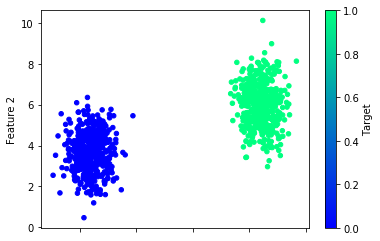

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples = 1000, 
                  centers = 2, 
                  n_features = 2, 
                  random_state = 78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns = ["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x = "Feature 1", 
                y = "Feature 2", 
                c = "Target", 
                colormap = "winter")

The **make_blobs** is used to create sample values and contains many parameters that change the shape and values of the sample dataset. Here, we're using make_blobs method to create 1,000 samples with two features (also known as our x- and y-axis values) that are linearly separable into two groups. 

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 78)

Once dummy data is generated, split data into training and test datasets using Scikit-learn’s train_test_split method.

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

Once training data is generated, prepare the dataset for neural network model. 

NOTE 1: Like any machine learning algorithm, it is crucial to normalize/standardize numerical variables to ensure that our neural network does not focus on outliers and can apply proper weights to each input. 

NOTE 2: In most cases, the more input variables that are normalized to the same scale, the more stable the neural network model is, and the better the neural network model will generalize.

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

Data is ready for our first neural network model! To create the neural network in our notebook, first create our Sequential model.

NOTE: The **nn_model** object will store the entire architecture of our neural network model.

In [6]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units = 1, 
                                   activation = "relu", 
                                   input_dim = 2))

Add layers to our Sequential model using **Keras’ Dense class**. For our first layer, define a few parameters:
* The **units** parameter indicates how many neurons we want in the hidden layer.
* The **activation** parameter indicates which activation function to use. ReLU activation function allows our hidden layer to identify and train on nonlinear relationships in the dataset.
* The **input_dim** parameter indicates how many inputs will be in the model.

In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units = 1, 
                                   activation = "sigmoid"))

Use the **Dense class** to tell our Sequential model what to do with the data. This time, we only need to supply the number of output neurons. 
* For a classification model, we only want a yes/no binary decision; therefore, we only need **one output neuron**. 
* In our previous layer, we used a ReLU activation function to enable nonlinear relationships; however, for our classification output, we want to use a **sigmoid activation function** to produce a probability output.

In [8]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


Note that the number of parameters in each layer does not equal the number of neurons we defined in the notebook. Remember, every layer has one additional input known as our bias term (or weighted constant).

In [9]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss = "binary_crossentropy", 
                 optimizer = "adam", 
                 metrics = ["accuracy"])

* The **loss** metric is used by machine learning algorithms to score the performance of the model through each iteration and epoch by evaluating the inaccuracy of a single input. 
    * We’ll use **binary_crossentropy**, which is specifically designed to evaluate a binary classification model.
* The **optimization** function shapes and molds a neural network model while it is being trained to ensure that it performs to the best of its ability. 
    * To enhance the performance of our classification neural network, we’ll use the **adam** optimizer, which uses a gradient descent approach to ensure that the algorithm will not get stuck on weaker classifying variables and features.
* In addition to the optimization function and loss metric, we’ll also add a more reader-friendly **evaluation metric**, which measures the quality of the machine learning model. 
    * There are two main types of evaluation metrics:
        * The model predictive accuracy
        * The model mean squared error (MSE)
            * We use accuracy for classification models and mse for regression models. For model predictive accuracy, the higher the number the better, whereas for regression models, MSE should reduce to zero.

*** At last, our Sequential neural network is modeled and compiled, so now we can move onto training/fitting our model to the dummy data. ***

In [10]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs = 100)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 1s 2ms/sample - loss: 0.9748 - accuracy: 0.1373
Epoch 2/100
750/750 [==============================] - 0s 173us/sample - loss: 0.9357 - accuracy: 0.0027
Epoch 3/100
750/750 [==============================] - 0s 153us/sample - loss: 0.9004 - accuracy: 0.0040
Epoch 4/100
750/750 [==============================] - 0s 196us/sample - loss: 0.8692 - accuracy: 0.0067
Epoch 5/100
750/750 [==============================] - 0s 235us/sample - loss: 0.8404 - accuracy: 0.0107
Epoch 6/100
750/750 [==============================] - 0s 147us/sample - loss: 0.8152 - accuracy: 0.0133
Epoch 7/100
750/750 [==============================] - 0s 216us/sample - loss: 0.7916 - accuracy: 0.0333
Epoch 8/100
750/750 [==============================] - 0s 169us/sample - loss: 0.7708 - accuracy: 0.0653
Epoch 9/100
750/750 [==============================] - 0s 143us/sample - loss: 0.7519 - accuracy: 0.1067
Epoch 10/100
750/750 [==============

750/750 [==============================] - 0s 187us/sample - loss: 0.6931 - accuracy: 0.5067
Epoch 79/100
750/750 [==============================] - 0s 131us/sample - loss: 0.6931 - accuracy: 0.5067
Epoch 80/100
750/750 [==============================] - 0s 117us/sample - loss: 0.6931 - accuracy: 0.5067
Epoch 81/100
750/750 [==============================] - 0s 126us/sample - loss: 0.6931 - accuracy: 0.5067
Epoch 82/100
750/750 [==============================] - 0s 128us/sample - loss: 0.6931 - accuracy: 0.5067
Epoch 83/100
750/750 [==============================] - 0s 119us/sample - loss: 0.6931 - accuracy: 0.5067
Epoch 84/100
750/750 [==============================] - 0s 122us/sample - loss: 0.6931 - accuracy: 0.5067
Epoch 85/100
750/750 [==============================] - 0s 116us/sample - loss: 0.6931 - accuracy: 0.5067
Epoch 86/100
750/750 [==============================] - 0s 116us/sample - loss: 0.6931 - accuracy: 0.5067
Epoch 87/100
750/750 [==============================] - 0s 

Looking at the model training output, we know that the loss metric was 0.07 and the predictive accuracy is 1.0. This means that although our model performance had more loss than the simulation data, the model correctly classifies all of our training data, which is sufficient for our needs.

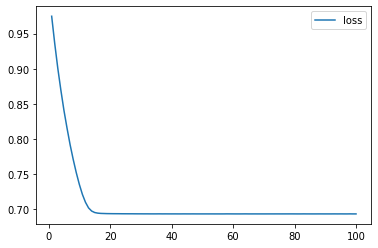

In [11]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history["loss"]) + 1))

# Plot the loss
history_df.plot(y = "loss")

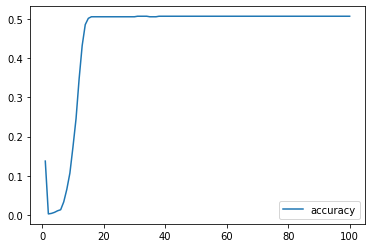

In [12]:
# Plot the accuracy
history_df.plot(y="accuracy")

Based on the loss and accuracy plots, the neural network model took around 10 epochs before it started to fit the training data with high success. (NOTE: This will vary depending out model training output.)


NOTE: When training completes, the model object stores the loss and accuracy metrics across all epochs, which we can use to visualize the training progress. In this example, we are visualizing our model’s loss over the full 100 epochs.

In [13]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose = 2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

250/1 - 0s - loss: 0.6920 - accuracy: 0.4800
Loss: 0.6937656683921813, Accuracy: 0.47999998927116394


Now that our model has been properly trained, we must evaluate model performance using the test data. 

Testing a neural network model in TensorFlow is very similar to testing a machine learning model in Scikit-learn. For our purposes, we’ll use the evaluate method and print the testing loss and accuracy values.

In [14]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples = 10, 
                          centers = 2, 
                          n_features = 2, 
                          random_state = 78)

new_X_scaled = X_scaler.transform(new_X)

nn_model.predict_classes(new_X_scaled)

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]], dtype=int32)

Now that we have a trained neural network model and we have verified its performance using a test dataset, we can apply this model to novel datasets and predict the classification of a data point. In our Sequential model, we can use the appropriately named **predict_classes** method to generate predictions on new data.

### Simple linear regression and singular perceptron models work really well as a binary classifier when the data is linearly separable. But what about nonlinear data? How does our basic neural network model behave when data becomes more complicated? ###

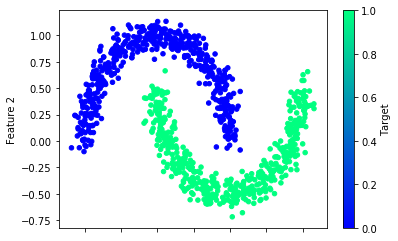

In [15]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples = 1000, 
                              noise = 0.08, 
                              random_state = 78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns = ["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x = "Feature 1",
                      y = "Feature 2", 
                      c = "Target",
                      colormap = "winter")

Here, we are generating some new dummy data --- some nonlinear moon-shaped data using Scikit-learn’s make_moons method and visualizing it using Pandas and Matplotlib.

In [16]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(X_moons, 
                                                                        y_moons, 
                                                                        random_state = 78)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

Like the previous dummy data example, we need to split our nonlinear data into training and testing datasets and normalize our datasets. 

In [17]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs = 100, shuffle = True)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 0s 337us/sample - loss: 0.6924 - accuracy: 0.5307
Epoch 2/100
750/750 [==============================] - 0s 159us/sample - loss: 0.6923 - accuracy: 0.5307
Epoch 3/100
750/750 [==============================] - 0s 189us/sample - loss: 0.6921 - accuracy: 0.5307
Epoch 4/100
750/750 [==============================] - 0s 205us/sample - loss: 0.6920 - accuracy: 0.5307
Epoch 5/100
750/750 [==============================] - 0s 213us/sample - loss: 0.6920 - accuracy: 0.5307
Epoch 6/100
750/750 [==============================] - 0s 172us/sample - loss: 0.6918 - accuracy: 0.5307
Epoch 7/100
750/750 [==============================] - 0s 215us/sample - loss: 0.6918 - accuracy: 0.5307
Epoch 8/100
750/750 [==============================] - 0s 152us/sample - loss: 0.6917 - accuracy: 0.5307
Epoch 9/100
750/750 [==============================] - 0s 214us/sample - loss: 0.6916 - accuracy: 0.5307
Epoch 10/100
750/750 [============

750/750 [==============================] - 0s 84us/sample - loss: 0.6913 - accuracy: 0.5307
Epoch 79/100
750/750 [==============================] - 0s 80us/sample - loss: 0.6913 - accuracy: 0.5307
Epoch 80/100
750/750 [==============================] - 0s 75us/sample - loss: 0.6913 - accuracy: 0.5307
Epoch 81/100
750/750 [==============================] - 0s 79us/sample - loss: 0.6913 - accuracy: 0.5307
Epoch 82/100
750/750 [==============================] - 0s 75us/sample - loss: 0.6913 - accuracy: 0.5307
Epoch 83/100
750/750 [==============================] - 0s 75us/sample - loss: 0.6913 - accuracy: 0.5307
Epoch 84/100
750/750 [==============================] - 0s 82us/sample - loss: 0.6913 - accuracy: 0.5307
Epoch 85/100
750/750 [==============================] - 0s 80us/sample - loss: 0.6914 - accuracy: 0.5307
Epoch 86/100
750/750 [==============================] - 0s 78us/sample - loss: 0.6913 - accuracy: 0.5307
Epoch 87/100
750/750 [==============================] - 0s 78us/samp

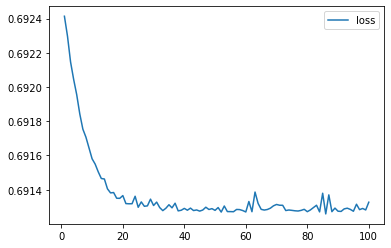

In [18]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index = range(1, len(model_moon.history["loss"]) + 1))

# Plot the loss
history_df.plot(y = "loss")

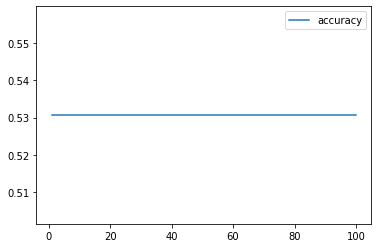

In [19]:
# Plot the loss
history_df.plot(y = "accuracy")

In [20]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [21]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units = number_hidden_nodes, 
                                    activation = "relu", 
                                    input_dim = number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units = 1, 
                                    activation = "sigmoid"))

#### A good rule of thumb for a basic neural network is to have two to three times the amount of neurons in the hidden layer as the number of inputs. ####

NOTE: Applying the neuron rule of thumb, we should use a neural network model with six neurons in the hidden layer to properly model our linear and nonlinear datasets.

In [22]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss = "binary_crossentropy", 
                  optimizer = "adam", 
                  metrics = ["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, 
                              y_moon_train, 
                              epochs = 100, 
                              shuffle = True)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 1s 2ms/sample - loss: 0.6892 - accuracy: 0.4893
Epoch 2/100
750/750 [==============================] - 0s 196us/sample - loss: 0.6698 - accuracy: 0.5520
Epoch 3/100
750/750 [==============================] - 0s 189us/sample - loss: 0.6504 - accuracy: 0.6427
Epoch 4/100
750/750 [==============================] - 0s 198us/sample - loss: 0.6306 - accuracy: 0.7360
Epoch 5/100
750/750 [==============================] - 0s 150us/sample - loss: 0.6101 - accuracy: 0.7733
Epoch 6/100
750/750 [==============================] - 0s 143us/sample - loss: 0.5887 - accuracy: 0.8000
Epoch 7/100
750/750 [==============================] - 0s 176us/sample - loss: 0.5665 - accuracy: 0.8213
Epoch 8/100
750/750 [==============================] - 0s 178us/sample - loss: 0.5436 - accuracy: 0.8413
Epoch 9/100
750/750 [==============================] - 0s 159us/sample - loss: 0.5202 - accuracy: 0.8627
Epoch 10/100
750/750 [==============

750/750 [==============================] - 0s 82us/sample - loss: 0.1838 - accuracy: 0.9280
Epoch 79/100
750/750 [==============================] - 0s 80us/sample - loss: 0.1825 - accuracy: 0.9280
Epoch 80/100
750/750 [==============================] - 0s 80us/sample - loss: 0.1812 - accuracy: 0.9293
Epoch 81/100
750/750 [==============================] - 0s 88us/sample - loss: 0.1798 - accuracy: 0.9293
Epoch 82/100
750/750 [==============================] - 0s 90us/sample - loss: 0.1785 - accuracy: 0.9293
Epoch 83/100
750/750 [==============================] - 0s 82us/sample - loss: 0.1771 - accuracy: 0.9293
Epoch 84/100
750/750 [==============================] - 0s 80us/sample - loss: 0.1758 - accuracy: 0.9307
Epoch 85/100
750/750 [==============================] - 0s 79us/sample - loss: 0.1745 - accuracy: 0.9307
Epoch 86/100
750/750 [==============================] - 0s 80us/sample - loss: 0.1730 - accuracy: 0.9307
Epoch 87/100
750/750 [==============================] - 0s 86us/samp

Now that our new Sequential model is defined, we need to compile and train the model using our nonlinear moon-shaped dummy data. For us to make direct comparisons with our single-neuron model, we’ll use the same training parameters, including loss metric, optimizer function, and number of epochs.

Looking at the training metrics of our new model, as we increase the number of neurons within the hidden layer, the classification accuracy improves. You may have noticed that adding multiple neurons to our neural network did not yield a perfect classification model. As input data becomes more complex, neural networks will require more and more optimization tweaks to achieve their desired accuracy.